In [9]:
%pip install numpy
%pip install matplotlib
%pip install plotly
%pip install scikit-learn
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np

def reshape_and_label_data(correct_file, wrong_file):
  """
  Reshapes data from .npy files into 3D arrays and assigns labels.

  Args:
    correct_file: Path to the .npy file containing correctly labeled data.
    wrong_file: Path to the .npy file containing incorrectly labeled data.

  Returns:
    A tuple containing:
      - X: A NumPy array with shape (samples, 30, 132) containing the reshaped data.
      - y: A NumPy array with shape (samples,) containing the labels (0 for incorrect, 1 for correct).
  """
  correct_data = np.load(correct_file)
  wrong_data = np.load(wrong_file)
  print(correct_data.shape)
  print(wrong_data.shape)
  # Reshape the data
  correct_data_reshaped = correct_data
  wrong_data_reshaped = wrong_data

  # Combine data and create labels
  X = np.concatenate((correct_data_reshaped, wrong_data_reshaped), axis=0)
  y = np.concatenate((np.ones(correct_data_reshaped.shape[0]), np.zeros(wrong_data_reshaped.shape[0])), axis=0)
  
  return X, y

# Example usage:
correct_file = r'C:\Users\ADMIN88\OneDrive\Desktop\push-up-detection\output_data\processed_key\correct_keypoints\correct_keypoints_normalized_keypoints.npy'
wrong_file = r'C:\Users\ADMIN88\OneDrive\Desktop\push-up-detection\output_data\processed_key\wrong_keypoints\wrong_keypoints_normalized_keypoints.npy' #replace with your wrong file path
X, y = reshape_and_label_data(correct_file, wrong_file)

print("X shape:", X.shape)
print("y shape:", y.shape)

(1500, 132)
(1500, 132)
X shape: (3000, 132)
y shape: (3000,)


In [11]:
from sklearn.model_selection import train_test_split

# Assuming X and y are defined as in the previous code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2400, 132)
y_train shape: (2400,)
X_test shape: (600, 132)
y_test shape: (600,)


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [13]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


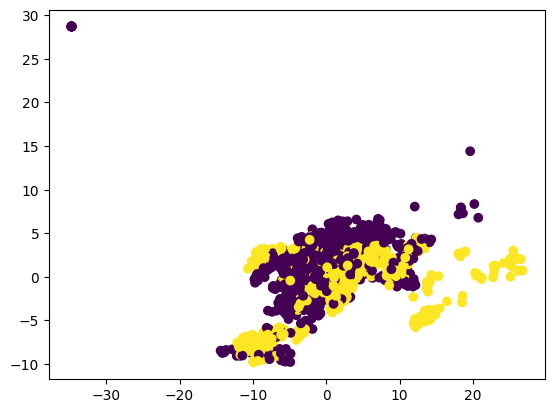

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train)
plt.show()

In [15]:
import plotly.graph_objects as go
import numpy as np

x1 = X_train_pca[:, 0]
y1 = X_train_pca[:, 1]
z1 = X_train_pca[:, 2]

# Create a 3D scatter plot
fig = go.Figure()
# Add the first scatter trace
fig.add_trace(go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    mode='markers',
    marker=dict(
        size=5,
        color=y_train,  # Color for the first set
        opacity=0.8
    ),  # Name for the legend
))


# Set the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    width = 800,
    height = 600,
    title='Multiple 3D Scatter Plots Example'
)

# Show the plot
fig.show()

In [16]:
# # prompt: build cnn-lstm model with sequential 30 frames 

# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization


# # Assuming X_train, X_test, y_train, y_test are defined as in the previous code

# # Define the CNN-LSTM model
# model = Sequential()

# # CNN layers
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(30, 132)))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.25))  # Add dropout for regularization

# model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.25))


# # LSTM layer
# model.add(LSTM(units=64))
# model.add(Dropout(0.5))


# # Dense layers
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)) # Adjust epochs and batch_size

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score
import joblib

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
# Save the model to a file
joblib.dump(knn, 'knn_model.pkl')

NameError: name 'classification_report' is not defined

In [8]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))

0.9483333333333334